# Coursework 1 - Mathematics for Machine Learning

## CID: 02530622

**Colab link:** https://colab.research.google.com/drive/1AXQ7uWpECBYdrP9Plpr8Rb8lLFie5sPw?usp=sharing

***
***

## Part 1: Quickfire questions [3 points]

#### Question 1 (True risk / Empirical risk):

Given samples and data distribution $(\textbf{x}, \textbf{y}) \sim D$, a hypothesis class and function, $f \in \hat{\mathcal{F}}$, where $f:X \rightarrow Y$ where $X$ is input space and $Y$ is output space, and loss function $L$, the true risk is

$$
R(f) := \mathbb{E}_D[L(f(\textbf{x}), \textbf{y})]\,.
$$
The true risk measures the expected value of the loss function over the sample distribution, hence giving an estimate to how good our model $f$ is.

Since $D$ is usually unkown, we resort to computing the empirical risk, using $N$ samples $(\textbf{x}_i, \textbf{y}_i)$ that we do posses,

$$
\hat{R}(f) := \frac{1}{N}\sum_i^N{L(f(\textbf{x}_i), \textbf{y}_i)}\, .
$$
So ideally we would like to find $\hat{f}$ that minimizes $R$, but since we usually cannot do that, we approximate it using $f^*$ that minimizes $\hat{R}$. The approximation is a good one if $N$ is large (by LLN), otherwise, the approximations isn't gurenteed to be good!


***
#### Question 2 ('Large' or 'rich' hypothesis class):

The benefit of a rich hypothesis class $\mathcal{F}$ is that its elements would be able to represent more complex data patterns. As we have a variety of functions to "choose" from, we would be able to fit a variety of data patterns. The downside of it is that the generalization error is bounded by the magnitude of the hypothesis class (according to Theorm 4.8, $\log{|\mathcal{F}|}$ appears in the numerator of the upper bound under $\sqrt{.}$). This means that a rich hypothesis class gives a bigger range to the generalization error (that we'd like to minimize). Moreover,a small drawback of a big hypothesis class is that it increases the chance of overfit.

***
#### Question 3 (Dataset splitting):

We cannot expect the unseen data error to be the same as the validation error. That is because we choose the model according to the validation data (e.g. tune hyperparameters to minimize validation data), so the model has some degree of correlation with this data. When we introduce unseen, novel data to the model, the model has no correlation at all to the new data, hence the error could be different.  

***
#### Question 4 (Occam’s razor):

Occam's razor states that if there are multiple plausible explanation to a certain result, the simpler one is the most likely. In statistical learning, an overfit model may be seen as a complex explanation compared to a (plausible) standard fit model, hence we should pick the latter. It applies to naturally occuring images as inputs to a model. An overfit model would be able to label an image from its training set, but if we alter the image slightly, it'd probably give an incorrect label (i.e. low robustness). That is a problem because in the natural world, images with the same label can be varied. For example, an overfit model would give different labels to a picture of a panda and a slightly noisy picture of a panda. Hence, we should follow Occam's razor and choose the simple model for processing of natural images (i.e. avoid overfit).

***
#### Question 5 (Generalisation error):

The generalization error for a given model $f$ is the difference between $R$ and $\hat{R}$ as defined an answer 1. Since we usually cannot compute $R$ (absence of $D$), we approximate it as the difference between two empirical errors $\hat{R}$, when one is taken on train data and the other on test data. In a good model, we want to minimize the generalization error. That would mean that our model would perform well on unseen test data, as we want.

***
#### Question 6 (Rademacher complexity pt1):

Rademacher complexity is a metric that measures the 'richness' of a family of functions $G$, using an average over the best fit of G to random noise. If $\mathcal{F}$ has high Rademacher complexity, it can fit random noise rather accurately. In turn it means that $\mathcal{F}$ contains functions that are able to be a good fit for a wide variery of different data patterns. When choosing a hypothesis class, if we know that our data patterns are complex and lack visible structure (lack correlation like random data), we should choose a class with high Rademacher complexity. Again, there is a slight drawback, bigger Rademacher complexity can also increase the chance of overfit.   

***
#### Question 7 (Rademacher complexity pt2):

The downside of $\mathcal{F}$ dependency in (73) is that the bigger the function class is, the bigger the generalization bound is. The size of the function class $\mathcal{|F|}$ may not represent fully the bound that we want.
Rademacher complexity can be seen as a more accurate bound on the generalization error because it measures how well our hypothesis class would fit random data, instead of plainly using the size of the class.


***
#### Question 8 (Regularisation term in the loss function):

A regularisation term in the loss function can aid in avoiding unwanted behaviour in the trained model. It is a way to "nudge" the model toward certain desired properties.
For example, when doing weight decay, we add the size of parameters $|\boldsymbol{\theta}|$ to the loss function to avoid large parameter values. Having small parameters (e.g. small weights) would result in the network being less "sensitive" to small input differences, which may be a desired result (robustness).

***
#### Question 9 (Momentum gradient descent):

In regular Gradient Descent (GD), we could have difficulty choosing the learning rate where the conditioning number $\frac{\lambda_{max}}{\lambda_{min}}$ is too big. The learning rate, "descent rate", would vary widely in different directions: in one direction we might have a big slope and overshoot the optimum, and in another a small slope and we won't reach the optimum!

Momentum GD solves this problem by accumulating previous gradient data in the step iteration, i.e. when choosing a new step, previous gradient values are accounted for. This solves the previous problem: if we have slow convergence in one direction the gradiant accumalation would make it faster, if we overshoot on a different direction, the gradients would change sign and the descent would slow down (in that direction).  

***
#### Question 10 (Adam):

ADAM is an optimization algorithm that is based on Momentum gradient descent. At it's core is the iteration rule over the model's parameters $\theta$, where
$\theta_{t+1}$ is updated using normalized expressions of $m_t$ and $v_t$, where:

* $m_t$ is accumelating gradiants called $g_t$, as in momentum GD
* $v_t$ is accumelating second moment of the gradiants $g_t^2$

We see that Adam makes use of the "momentum" part of MGD even more so, as it uses the first and second moments of the gradiants. In the previous question we had already seen the effects of the first moment. The second moment accounts for the "width" of the gradient, and is sometimes called uncentered variance.
Adam uses normalized $v_t$ and $m_t$ to counter an initialization bias that was detected in empirical work.  


***
#### Question 11 (AdaGrad):

AdaGrad is an optimazation algorithm that implements Momentum GD. It uses a diagonal metrix called $G$ in which each element represents the sum of the squared gradiants up to this time point, and divides the gradient by this term (specifically $\frac{g_t}{\sqrt{G_{ii}^t + \epsilon}}$ where $ϵ$ is used to avoid zero division). This gives the method a decaying learning rate, which is useful (see Q12).
This method has been found to improve the robustness of Stochastic GD.

The drawback of the method is that the learning rate decreases with each iteration with no outside control. The denumertor is a sum of positive element, so it grows, and the learning rate may decay to zero.

***
#### Question 12 (Decaying Learning Rate):

Decaying learning rate can be useful when seeking the minimum in the loss landscape. In the lanscape (i.e. loss values over $n$-dimensional parameter space), we might have many dips and valleys of diffrent sizes, shapes, and slopes. Our trajectory is seeking the minimum loss value, i.e. descending as much as possible. A big learning rate would be helpful in descending big and wide valleys, as it is making "big leaps" in the landscape. But as the trajectory descends, the valleys diameter would grow smaller (we increase the resolution, or zooming in). So a big learning rate would make the trajectory jump over and miss the valley instead of going into it. Decaying the learning rate would make the trajectory take small steps towards the valley, and therefore entering it.

We can picture it as throwing a marble to a hole in the ground. If the hole is big and far away, we should make a long throw. If the hole is small and near, we should take a short throw. If there is a small hole inside a big valley, we should first take a long throw into the valley, then a short one into the small hole.

***
***

## Part 2: Short-ish proofs [6 points]


### Question 2.1: Bounds on the risk [1 point]


#### (1)
Let us reframe our problem in the notation of Hoeffding's Inequality (Theorm 4.2 notes) and then substitute in the inequality.

For $S$ training sample and $N$ i.i.d variables $\{\textbf{x}\}_{i=1}^N$ distributed according to $D$
 (these are r.v. and not samples), we assume deterministic targets $y_i = f(\boldsymbol{x})$ for some $\boldsymbol{x}$. We also assume that our loss function is $L(f(\textbf{x}), y)=\mathbb{1}_{f(\textbf{x})\ne y}$ .


Now, in the notation of Theorm 4.2, consider the random variables $X_i := L(f(\textbf{x}_i), y_i)$. They are i.i.d because $\textbf{x}_i$ are i.i.d and they are bounded between $[a_i,b_i]=[0,1] \forall i \le N$.

Define $S_N := ∑^N_i{X_i}$ and note that $S_N = N\hat{R}(f)$. Also note, using linearity of expectation and definition of $\hat{R}(f)$:

$$
\begin{equation}
\mathbb{E}[S_N] = \mathbb{E} [N\hat{R}(f)] = ∑_i^N \mathbb{E}[L(f(\textbf{x}_i), y_i)] = N \mathbb{E}[L(f(\textbf{x}_1), y_1)]=NR(f)
\end{equation}
$$

Now, as $X_i$ are bounded i.i.d, we can use Hoeffdings Inequality:

Choose $\tilde{ϵ}>0$. Then,

$$
\begin{equation}
\mathbb{P}[|S_N - \mathbb{E}[S_N]| \ge \tilde{ϵ}] \le  \exp{(-2\tilde{ϵ}^2/∑_i^N(b_i - a_i)}).
\end{equation}
$$

Using our definitions and relations, this becomes
$$
\begin{equation}
\mathbb{P}[|N\hat{R}(f) - NR(f)| \ge \tilde{ϵ}] \le  \exp{(-2\tilde{ϵ}^2/∑_i^N(1)})=\exp{\frac{-2\tilde{ϵ}^2}{N}}.
\end{equation}
$$

And since $\tilde{ϵ}$ is arbitrary, we can choose $\tilde{ϵ}=Nϵ$ to find:

$$
\begin{equation}
\mathbb{P}[|\hat{R}(f) - R(f)| \ge ϵ] \le  \exp{(-2ϵ^2/∑_i^N(1)})=\exp{-2N ϵ^2}.
\end{equation}
$$

Which gives us Corollary 4.6. 🙂


*Remark:* the probability and the expectation are taken with respect to our sample $S$ out of the distribution $D^N$.


#### (2)
The interpretation of the result above shows us that the emprical risk converge to the true risk when we take $N \to \infty$. A desired result.


Let us also look at the inverse of the result above:

$$
\begin{equation}
\mathbb{P}[|\hat{R}(f) - R(f)| < ϵ] \le 1 - \exp{(-2N ϵ^2)}.
\end{equation}
$$
Now if we fix $N$ and take $ϵ → 0$ then we would find that the probability of the generalization error to be zero is zero!

In general, this means that there is a "fight" between the sample size $N$ and our bound $ϵ$, only that the bound is quadratic. If we want the generalization error to drop below $ϵ$ (within a given fixed tolerance), then increasing $N$ quadratically would give us the desired tolerance!    




#### (3)
The bound in Theorm 4.8 tells us that the generalization error is bounded by the log of the cardinality of the hypothesis class. This means that there is a tradeoff:
Choosing a big hypothesis class will allow our model to fit complex data better, but it will also raise the bound, so our generalization error could get bigger. This makes sense because a big hypothesis class gives a bigger chance to overfit.
However, the log function ensures that the bound goes up slower then our hypothesis class expands, which is helpful.

***

### Question 2.2: On semi-definiteness [1 point]

First let us show that $g$ is convex.
The derivative of $g$ is
$$
g'(t) = \frac{df}{dt} = (\nabla f) \frac{d}{dt} (\boldsymbol{x} + t \boldsymbol{v}) = \nabla f ^T \cdot \boldsymbol{v} \; .
$$

Denote $t_1, t_2$ and $\boldsymbol{y}_i = \boldsymbol{x} + t_i \boldsymbol{v}$, so $g(t_i) = f(\boldsymbol{y}_i) \; i=1,2$. Then, using convexity of $f$:

$$
g(t_1) = f(\boldsymbol{y}_1) \ge f(\boldsymbol{y}_2) + \nabla f(\boldsymbol{y}_2)^T \cdot(\boldsymbol{y_1 - y_2}) \\
= g(t_2) +  \nabla f(\boldsymbol{y}_2)^T \cdot \boldsymbol{v} (t_1 - t_2) \\
= g(t_2) +  g'(t_2)  (t_1 - t_2) \; ,
$$

hence $g$ is convex. This makes sense, as $g$ is just a translation of $f$ in a certain (constant) direction, so the geometry of $f$ remains.

Since $g$ is convex, $g''(t) \ge 0$, which is,

$$
g''(t) = \frac{d}{dt} \nabla f^T \boldsymbol{v} = \boldsymbol{v}^T \cdot \nabla^2 f \cdot \boldsymbol{v} \ge 0 \; .
$$
The last equation is independent of choice of $\boldsymbol{v}$, hence the Hessian of $f$ is positive semidefinite.

***

### Question 2.3: A quick recap of momentum [1 point]

##### (1)

Using this decomposition, we can identify and work with the "preferred directions" of the system, i.e. work in a coordinate system where the coordinates $w^1, ..., w^k$ are aligned with the directions of our objective function (physics point of view). In the old coordinates, a gradiant descent step will couple a few coordinates, but in the new ones, the coordinates would be decopled from each other. Then, we can analyze the gradiant descent in each direction seperatly, where $\lambda _i$ gives us the convergent rate in each new direction.

##### (2)

The trouble with this gradiant descent method appears when the conditioning number, $\lambda _d / \lambda _i$ is large (where $\lambda _d$ is the highest eigenvalue and $\lambda _i$ is the lowest). That means that in one or more directions we have fast convergence and in others slow convergence. The learning rate $\frac{\lambda_d / \lambda_i - 1}{\lambda_d / \lambda_i + 1}$ is uniform for all directions, as we can see from:

$$
\boldsymbol{w}_{k+1} =  \boldsymbol{w}_k - \alpha \boldsymbol{\lambda} \boldsymbol{w}_k
$$

where $\boldsymbol{\lambda} \boldsymbol{x}_k$ is pointwise multiplication. This means that if in one direction $\lambda$ is big, but the learning rate also happens to be big, we will probably overshoot the optimum in that direction. If $\lambda$ is small for some direction and the learning rate happens to be small, then we might not reach convergence.

Hence, the problem is that the learning rate is applied uniformly in all directions, although in some directions we have faster convergence rates than others.

##### (3)
In the lecture notes it is shown that the iterative step $\boldsymbol{w}_{k+1}$ is proportional to $R^{k+1}$. Thus, by analysing $R$, we can know wheter the iterations will converge or not. For example if $\Vert R^k \Vert$ is bounded for all $k$, then we know that $\boldsymbol{w}_k$ won't diverge. In the analysis it is shown that $\Vert R \Vert$ is bounded by $\max_{i} {|e_i|}^k$ where $e_i$ are the eigenvalues. Hence, if $\max{|e_i|} < 1$, then we know that the bound will converge to zero as $k \to \infty$. We luckily have 2 hyperparameters in $R$ - the learning rate $\alpha$ and momentum rate $\beta$, so we can adjust them to assure that $\max{|e_i|} < 1$.

##### (4)
When the discriminant is negative in the lecture notes analysis, then we have two eigenvalues, $e_1, e_2$, such that $e_1 = e_2^*$. As stated in (3), we are interested in showing $\max |e_i| < 1$. In this case we find

$$
|e_1| = |e_2| = \sqrt{e_1 e_2^*} = \sqrt{\det R} = \sqrt{\beta}  \; .
$$

Since we control $\beta$, this means that under this condition, we control the convergence rate! Moreover, it is independent from other hyperparameters (e.g. $\alpha$), which enables us to set them independently.

***

### Question 2.4: Convergence proof [3 points]

#### (1)
Evolution of Newton's method:

$$
\boldsymbol{x}_{k+1} = \boldsymbol{x}_{k} - \alpha \nabla^2 f(\boldsymbol{x}_{k})^{-1} \nabla f(\boldsymbol{x}_{k})
$$
where $\alpha$ is the learning rate. We'll take $\alpha=1$ in the following calculations.

#### (2)

Let us compute the gradiant of $f$:

$$
\nabla f(\boldsymbol{x}) = \frac{1}{2} \nabla (\boldsymbol{x}^T Q \boldsymbol{x}) + \nabla(b^T \boldsymbol{x} + c) = \frac{1}{2} (\boldsymbol{x}^T Q)^T + \frac{1}{2} Q \boldsymbol{x} + b^T = Q \boldsymbol{x} + b^T
$$

where we used the fact that $Q$ is positive definite, hence symmetric.
Now the Hessian:

$$
\nabla^2 f(\boldsymbol{x})_{i,j} =  \frac{1}{2} \frac{\partial^2}{\partial {x_i} \partial {x_j}} \sum_{l, k} x_l x_k Q_{lk} = \frac{1}{2} \sum_{l, k} (\delta _{il} \delta _{jk} + \delta _{jl} \delta _{ik}) Q_{lk} = \frac{1}{2} (Q_{ij} + Q_{ji}) = Q_{ij}
$$

where in the last step we used symmetry of $Q$ again.
Combining this we find:

$$
\boldsymbol{x}_{1} = \boldsymbol{x}_{0} - Q^{-1} (Q \boldsymbol{x_0} + b^T ) = -Q^{-1}b^T
$$
which leads to

$$
\nabla f(\boldsymbol{x}_1) = -Q(Q^{-1}b^T) +  b^T = 0 \; .
$$
Note that the hessian is positive at all points ($Q$ is positive definite), therefore $\boldsymbol{x}_1$ is in fact a minimum ($\boldsymbol{x}_1 = \boldsymbol{x}^{*}$). Hence, the method converged to the minimum in a single step.

#### (3)
Generally, it means that in a local neighborhood of $\boldsymbol{x}^*$, $f$ 'looks' as if it is quadratic, so 2nd order Taylor can be used to find the minimum. In fact the method is based on 2nd order Taylor expansion, hence one of the condition is that we can expand the function using 2nd order taylor ($f \in C^3$).

When our function is quadratic as in (2), the Taylor expansion is no longer an approximation, it is exact. Hence the method converges in a single step.    

#### (4)

We can view the Hessian as a matrix valued function in the sense of Lemma 0.2. Then according to the Lemma, since the Hessian is invertible at $\boldsymbol{x}^*$, there exists $B(\epsilon, \boldsymbol{x}^*)$ such that every point in that environment has an invertible Hessian. Let $\boldsymbol{x}_0$ be in that environment, then,

$$
\Vert \boldsymbol{x}_1 - \boldsymbol{x}^* \Vert = \Vert (\boldsymbol{x}_0 - \boldsymbol{x}^*) - \nabla^2 f(\boldsymbol{x}_{0})^{-1} \nabla f(\boldsymbol{x}_{0}) \Vert \\
= \Vert \nabla^2 f(\boldsymbol{x}_{0})^{-1} \left[ \nabla^2 f(\boldsymbol{x}_{0}) (\boldsymbol{x}_0 - \boldsymbol{x}^*) - \nabla f(\boldsymbol{x}_{0}) \right] \Vert \\
\le \Vert \nabla^2 f(\boldsymbol{x}_{0})^{-1} \Vert \Vert \nabla^2 f(\boldsymbol{x}_{0}) (\boldsymbol{x}_0 - \boldsymbol{x}^*) - \nabla f(\boldsymbol{x}_{0}) \Vert
$$
where in the last inequality we used Lemma 0.1 and matrix norm.

#### (5)

We will try to bound the expression from (4) (using the Ed hint). First note that, according to Lemma 0.2 as stated before, for $\boldsymbol{x_0} \in B(\epsilon, \boldsymbol{x^*})$ the Hessian is invertible (and bounded). We can define

$$
c_1 := \Vert \nabla^2 f(\boldsymbol{x}_{0})^{-1} \Vert \; .
$$

Next, we approximate $\nabla f$ by Taylor at $x_0$,

$$
\nabla f(\boldsymbol{x}) = \nabla f(\boldsymbol{x_0}) + \nabla^2 f(\boldsymbol{x - x_0}) + \mathcal{O} \left(  (\boldsymbol{x} - \boldsymbol{x_0}) ^2 \right)
$$

Then, if we isolate the $\mathcal{O}$ term, and take the norm, we find

$$
\Vert \nabla f(\boldsymbol{x}) - \nabla f(\boldsymbol{x_0}) - \nabla^2 f(\boldsymbol{x - x_0}) \Vert ^2 \le c_2   \Vert \boldsymbol{x} - \boldsymbol{x_0} \Vert ^2
$$

where $c_2>0$ is a constant. We can think of this as the "error" of our taylor approximation. Note that this is a bound on the RHS differene in (4).
Taking $\boldsymbol{x} = \boldsymbol{x}^*$, we know that $\nabla f(\boldsymbol{x}^*) = 0$, using $c_1$ and the inequality from (4) results in

$$
\Vert \boldsymbol{x}^* - \boldsymbol{x}_1 \Vert \le c_1 \Vert - \nabla f(\boldsymbol{x_0}) - \nabla^2 f(\boldsymbol{x^* - x_0}) \Vert ^2 \le c_1c_2   \Vert \boldsymbol{x^*} - \boldsymbol{x_0} \Vert ^2 \; .
$$


#### (6)
We will use the previous result. Again $\boldsymbol{x_0} \in B(\epsilon, \boldsymbol{x^*})$. The given assumption can be rewritten as

$$
c_1c_2 \Vert \boldsymbol{x}^* - \boldsymbol{x}_0 \Vert ^2 \le \alpha \Vert \boldsymbol{x}^* - \boldsymbol{x_0} \Vert \; .
$$
Then, using (5) and $\alpha < 1$ we find

$$
\Vert \boldsymbol{x}^* - \boldsymbol{x}_1 \Vert \le c_1c_2 \Vert \boldsymbol{x}^* - \boldsymbol{x}_0 \Vert ^2 \le \alpha \Vert \boldsymbol{x}^* - \boldsymbol{x}_0 \Vert \le \Vert \boldsymbol{x}^* - \boldsymbol{x}_0 \Vert < \epsilon \; .
$$

The last series of inequalties also applies if we plug the given assumption to get
$$
\Vert \boldsymbol{x}^* - \boldsymbol{x}_1 \Vert \le \Vert \boldsymbol{x}^* - \boldsymbol{x}_0 \Vert \le \frac{\alpha}{c_1c_2}  \; .
$$

#### (7)
Given $\boldsymbol{x}_k \in B(\epsilon, \boldsymbol{x}^*)$ and $\Vert \boldsymbol{x}^* - \boldsymbol{x}_k \Vert \le \frac{\alpha}{c_1c_2}$, we can repeat the above to find

$$
\Vert \boldsymbol{x}^* - \boldsymbol{x}_{k+1} \Vert \le c_1c_2 \Vert \boldsymbol{x}^* - \boldsymbol{x}_k \Vert ^2 \le \alpha \Vert \boldsymbol{x}^* - \boldsymbol{x}_k \Vert \; .
$$

#### (8)
Applying (7) in iteration results in

$$
\Vert \boldsymbol{x}^* - \boldsymbol{x}_{k+1} \Vert \le \alpha \Vert \boldsymbol{x}^* - \boldsymbol{x}_k \Vert \le ... \le \alpha^k \Vert \boldsymbol{x}^* - \boldsymbol{x}_0 \Vert < \epsilon \; ,
$$

hence  $\lim_{k\to\infty} \Vert \boldsymbol{x}^* - \boldsymbol{x}_{k+1} \Vert = 0$.
Note that this is subject to the constraints $0< \alpha < 1,\Vert \boldsymbol{x}^* - \boldsymbol{x}_k \Vert \le \frac{\alpha}{c_1c_2}$.

The quadratic rate can be seen from applying (5):
$$
\Vert \boldsymbol{x}^* - \boldsymbol{x}_{k+1} \Vert \le c_1c_2   \Vert \boldsymbol{x}^* - \boldsymbol{x}_{k} \Vert ^2 \; .
$$



***
***

## Part 3: A deeper dive into neural network implementations [3 points]

In [3]:
# Import libraries
import numpy as np
import torch
import torch.nn as nn
import torchvision

from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.optim as optim


In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [5]:
# Download datasets
train_set_mnist = torchvision.datasets.MNIST(root="./data", download=True,
                                         train=True, transform=transforms.Compose([transforms.ToTensor()]));

test_set_mnist = torchvision.datasets.MNIST(root="./data",download=True,
                                        train=False,transform=transforms.Compose([transforms.ToTensor()]),);

train_set_cifar = torchvision.datasets.CIFAR10(root="./data", download=True,
                                         train=True, transform=transforms.Compose([transforms.ToTensor()]));

test_set_cifar = torchvision.datasets.CIFAR10(root="./data",download=True,
                                        train=False,transform=transforms.Compose([transforms.ToTensor()]),);

# Normalizing data:
train_set_mnist.data = nn.functional.normalize(train_set_mnist.data.to(float), p=1)
test_set_mnist.data = nn.functional.normalize(test_set_mnist.data.to(float), p=1)

100%|██████████| 9912422/9912422 [00:00<00:00, 84068101.06it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 21334218.71it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 24769586.21it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 18143360.73it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 170498071/170498071 [00:03<00:00, 48918551.79it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


***
#### Data preprocess

In [6]:
class ImageDataset(Dataset):
    def __init__(self, dataset_type, train: bool, normalize: bool, nclasses=10):
        """
            A PyTorch Dataset class for loading and normalizing MNIST or CIFAR datasets.
            This class preprocesses the data in the following way:
            * Choosing the correct trainset or testset.

            * Converting the targets from integers to arrays with length nclass
              s.t. the all of the components are zero except the target componenet which is one.
              e.g. for raw_target=4, target=[0, 0, 0, 0, 1, 0, 0, 0, 0, 0].

            * Casting the data and targets to torch.float32 (prevents future problems)

            * If normalize=True, normalizes the dataset by the p1 norm.

            Args:
                dataset_type (str): Type of dataset, either "mnist" or "cifar".
                train (bool): If True, load the training set; otherwise, load the test set.
                normalize (bool): If True, normalize the data.
                nclasses (int): Number of classes in the dataset.
        """
        match (dataset_type, train):
            case ("mnist", True):
                self.data =  train_set_mnist.data
                raw_targets = train_set_mnist.targets

            case ("mnist", False):
                self.data =  test_set_mnist.data
                raw_targets = test_set_mnist.targets

            case ("cifar", True):
                self.data =  train_set_cifar.data
                raw_targets = train_set_cifar.targets

            case ("cifar", False):
                self.data =  test_set_cifar.data
                raw_targets = test_set_cifar.targets

            case _:
                raise ValueError("Dataset must be 'mnist' or 'cifar'")


        self._create_data(raw_targets)
        self._create_targets(raw_targets, nclasses)

        if normalize:
            self.data = nn.functional.normalize(self.data, p=1)

        self.targets = self.targets.to(device=device)
        self.data = self.data.to(device=device)

    def _create_data(self, raw_targets):
      """
        A method that manipulates the dataset. The purpose is to override in
        child classes.
      """
      self.data = torch.tensor(self.data, dtype=torch.float32)


    def _create_targets(self, raw_targets, nclasses):
      """
        A method that gets the raw_targets (labels) and manipulates them to new
        targets. The purpose is to override in child classes.
      """
      self.targets = torch.zeros(len(raw_targets), nclasses, dtype=torch.float32)
      for i, t in enumerate(raw_targets):
          self.targets[i, int(t)] = 1.   # Changing the targets into rows with 0 everywhere except the target


    def __len__(self):
        return self.data.shape[0]

    def __getitem__(self, index):
        return self.data[index], self.targets[index]

def test_dataset():
    """
      Test the ImageDataset class by creating an instance and printing a sample.
    """
    traindata = ImageDataset("cifar", False, True)
    print(traindata[10])

# Uncomment for test:
# test_dataset()

***

### Part 3.1: Implementations [1 point]



#### Task 1 - Fully connected NN

In [7]:
# Set seed
SEED = int('02530622')
np.random.seed(SEED)
torch.manual_seed(SEED);

In [9]:
class Net(nn.Module):
    def __init__(self, dim, nclass, width, depth):
      """
        A simple feedforward neural network model.

        Args:
            dim (tuple): Input dimensions (e.g., (28, 28) for MNIST).
            nclass (int): Number of classes in the output.
            width (int): Width of the hidden layers.
            depth (int): Number of hidden layers.
      """
      super().__init__()
      self.dim = dim
      self.nclass = nclass
      self.width = width
      self.depth = depth
      self.input_length = np.prod(dim)

      self.flatten = nn.Flatten()
      self.linear_in = nn.Linear(self.input_length, width, device=device)
      self.linear_hidden = nn.Linear(width, width, device=device)
      self.relu = nn.ReLU()
      self.linear_out = nn.Linear(width, nclass, device=device)

    def forward(self, input):
      """
        Forward pass of the neural network.

        Args:
            input (torch.Tensor): Input tensor. Changing the name to "x" for convenience.

        Returns:
            torch.Tensor: the output of the network for given input.
      """

      x = input   # Changing to a more convenient name
      flat_x = self.flatten(x)
      lifted_x = self.linear_in(flat_x)

      processed_x = lifted_x
      for _ in range(self.depth):
        processed_x = self.relu(self.linear_hidden(processed_x))

      return self.linear_out(processed_x)

def test_net(net=None):
  """
    Test the Net class by creating an instance and making a forward pass with a sample.

    Args:
        net (Net, optional): A pre-trained Net instance. If None, create a new instance.
  """

  mnist_net = Net((28, 28), 10, 16, 2) if net is None else net
  sample_index = np.random.randint(10000)

  x = train_set_mnist.data[sample_index, :, :]
  x = torch.unsqueeze(x, 0)
  print(mnist_net(x), train_set_mnist.targets[sample_index])


# test_net()

#### Tasks 2-5
All of these tasks are implemented in the NeuralNetworkTrainer class for convenience.

In [10]:
class NeuralNetworkTrainer():
  def __init__(
      self,
      dataset_type,
      width,
      depth,
      criterion, # Notice we assume that reduction="mean"
      optimizer,
      batch_size=64,
      lr=0.001,
      max_epoch=1,
      normalize=True
      ):
    """
      A high-level class for creating, training, and evaluating neural networks on MNIST or CIFAR datasets.

      Args:
          dataset_type (str): Type of dataset, either "mnist" or "cifar". dim is set accordingly.
          width (int): Width of the hidden layers in the neural network. Hyperparamater!
          depth (int): Number of hidden layers in the neural network. Hyperparamater!
          criterion (torch loss function): Loss function for training. Assume the loss uses reduction="mean" !
          optimizer (torch.optim.Optimizer): Optimization algorithm for training.
          batch_size (int, optional): Batch size for training and testing. Default is 64. Hyperparamater!
          lr (float, optional): Learning rate for the optimizer. Default is 0.001. Hyperparamater!
          max_epoch (int, optional): Maximum number of training epochs. Default is 1. Hyperparamater!
          normalize (bool, optional): If True, normalize the data. Default is True.
    """

    match dataset_type:
      case "mnist":
        dim = (28, 28)
        nclass = 10

      case "cifar":
        dim = (32, 32, 3)
        nclass = 10

      case _:
        raise ValueError("Dataset must be 'mnist' or 'cifar'")

    self.trainset = ImageDataset(dataset_type, train=True, normalize=normalize)
    self.testset = ImageDataset(dataset_type, train=False, normalize=normalize)
    self.batch_size = batch_size
    self.trainloader, self.testloader = self.loading_data()

    self.net = Net(dim, nclass, width, depth)

    self.lr = lr
    self.max_epoch = max_epoch
    self.optimizer = optimizer(self.net.parameters(), lr=self.lr)
    self.criterion = criterion


  def loading_data(self): # Notice that all of the required arguments are now attributes!
    """
      Create DataLoader instances for the training and testing datasets.

      Returns:
          tuple: Tuple containing DataLoader instances for training and testing.
    """

    trainloader = DataLoader(self.trainset, self.batch_size, shuffle=True)
    testloader = DataLoader(self.testset, self.batch_size, shuffle=False)

    return trainloader, testloader


  def train_epoch(self):  # Notice that all of the required arguments are now attributes!
    """
      Perform one training epoch.

      Returns:
          torch.Tensor: Training loss for the epoch.
    """

    self.net.train()

    for X, y in self.trainloader:
      y_hat = self.net(X)
      local_loss = self.criterion(y_hat, y)

      local_loss.backward()
      self.optimizer.step()
      self.optimizer.zero_grad()

    return self.criterion(
      self.net(self.trainloader.dataset.data),
      self.trainloader.dataset.targets
      )


  def test_epoch(self):
    """
      Perform one testing epoch.

      The error is computed as follows:
      torch.max(..., 1)[1] is doing argmax over each row and returns a list if ints, s.t.
      each int corresponds to the index that has maximal value in this row.
      argmax on a prediction returns the most likely class, argmax on the targets give the target.
      So, the number of zeros in the expression argmax(predict) - argmax(target) will give back the
      number of succsesful predictions, and the number of nonzero elements will give the errors!
      Example (batch=2, nclass=3):

      predictions = [[0.6, 0.4, 0.,],
                    [0.7, 0.2, 0.1,]]

      targets =     [[1, 0., 0.,],
                    [0., 1, 0.,]]

      argmax(predictions) - argmax(targets) = [0 - 0, 0 - 1] = [0, -1]
      => number of errors = numbers of nonzero elements = 1



      Returns:
          tuple: Tuple containing testing loss and number of classification errors.
    """
    self.net.eval()
    y = self.testloader.dataset.data
    targets = self.testloader.dataset.targets

    y_hat = self.net(y)
    mean_loss = self.criterion(y_hat, targets) # Asuuming reduction="mean"

    target_class = torch.max(targets, 1)[1]
    predicted_class = torch.max(y_hat, 1)[1] # Argmax gives predicted_class

    num_errors = len(torch.nonzero(predicted_class - target_class))


    return mean_loss, num_errors


  def train_me(self, logs=True):
    """
      Train the neural network for  max_epoch and print training and testing statistics.
    """

    samples_len = self.testset.data.shape[0]
    for i in range(self.max_epoch):
      epoch = i + 1
      train_loss = self.train_epoch()
      test_loss, test_err = self.test_epoch()

      if logs:
        print(f"Epoch: {epoch} | Train Loss: {train_loss:.04} |"
              f"Test Loss: {test_loss:.04} | Test Error: {test_err/samples_len:.04}")

    return np.array([float(train_loss), float(test_loss)])


def test_trainednetwork():
  """
    Test for simple runtime errors of the trained neural network on
    the CIFAR dataset.
  """
  cifar_net = NeuralNetworkTrainer(
      dataset_type="cifar",
      width=100,
      depth=2,
      criterion=nn.CrossEntropyLoss(),
      optimizer=optim.Adam,
      max_epoch=10
  )

  cifar_net.train_me()

# Uncomment for network test
test_trainednetwork()

Epoch: 1 | Train Loss: 1.986 |Test Loss: 1.989 | Test Error: 0.7129
Epoch: 2 | Train Loss: 1.845 |Test Loss: 1.863 | Test Error: 0.6652
Epoch: 3 | Train Loss: 1.806 |Test Loss: 1.833 | Test Error: 0.6511
Epoch: 4 | Train Loss: 1.722 |Test Loss: 1.766 | Test Error: 0.6264
Epoch: 5 | Train Loss: 1.716 |Test Loss: 1.766 | Test Error: 0.6261
Epoch: 6 | Train Loss: 1.651 |Test Loss: 1.708 | Test Error: 0.6039
Epoch: 7 | Train Loss: 1.678 |Test Loss: 1.735 | Test Error: 0.6059
Epoch: 8 | Train Loss: 1.623 |Test Loss: 1.698 | Test Error: 0.5966
Epoch: 9 | Train Loss: 1.601 |Test Loss: 1.69 | Test Error: 0.5952
Epoch: 10 | Train Loss: 1.568 |Test Loss: 1.662 | Test Error: 0.5869


Utility functions:

In [ ]:
def hyperparameter_scan(hyperparams, scan_param, param_range, logs=False):
  """
    Perform a hyperparameter scan over a specified range.

    Args:
        hyperparams (dict): Dictionary of fixed hyperparameters for the neural network.
        scan_param (str): Hyperparameter to scan.
        param_range (list): Range of values to scan for the specified hyperparameter.

    Returns:
        dict: Dictionary containing errors for each value in the param_range.
  """

  errors = {}
  for e in param_range:

      hyperparams[scan_param] = e
      mnist_net = NeuralNetworkTrainer(**hyperparams)

      errors[e] = mnist_net.train_me(logs=logs)

  return errors


def plot_errors(errors, xval, title, xlabel):
  """
    Plot the training and testing errors.

    Args:
        errors (dict): Dictionary containing errors tuple for different values
                       of a hyperparameter, (train_error, test_error)
        xval (list): Values of the hyperparameter.
        title (str): Title for the plot.
        xlabel (str): Label for the x-axis.
  """

  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel("Loss")

  train_error = [errors[e][0] for e in xval]
  test_error = [errors[e][1] for e in xval]
  plt.plot(xval, train_error, label="train loss")
  plt.plot(xval, test_error, label="test loss")

  plt.legend()
  plt.grid()


***

### Part 3.2: Numerical exploration [2 points]

#### Finding max epoch

In order to find an epoch for convergence, we will fix the below hyperparameters and calculate the loss for each epoch. We use depth of 5 and width of 150 to capture both the depth and width cases.

| Hyperparameter | Fixed Value |
|---|---|
| `width` | 150 |
| `depth` | 5 |
| `criterion` | nn.CrossEntropyLoss() |
| `optimizer` | optim.Adam |
| `batch_size` | 64 |
| `lr` | 0.001 |


<ipython-input-18-c04c0ef3e4a6>:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.data = torch.tensor(self.data, dtype=torch.float32)


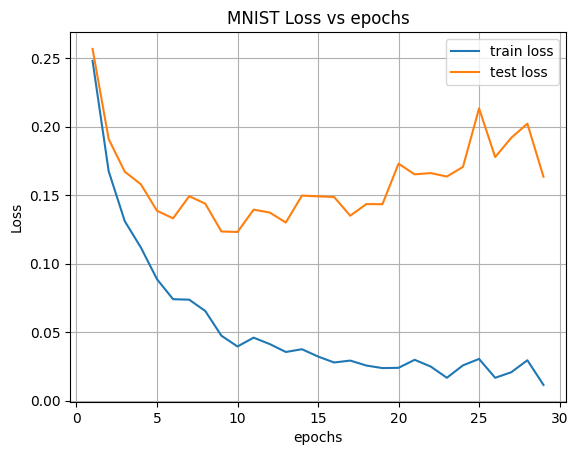

In [ ]:
hyperparams = {
    "dataset_type": "mnist",
    "width": 150,
    "depth": 5,
    "criterion": nn.CrossEntropyLoss(),
    "optimizer": optim.Adam,
    "batch_size": 64,
    "lr": 0.001,
    "max_epoch": 25,
    "normalize": True
}


mnist_net = NeuralNetworkTrainer(**hyperparams)
errors = {}
for e in range(1, hyperparams["max_epoch"]):
  train_loss = mnist_net.train_epoch()
  test_loss, num_err = mnist_net.test_epoch()

  errors[e] = np.array([float(train_loss), float(test_loss)])

plot_errors(errors, range(1, hyperparams["max_epoch"]), "MNIST Loss vs epochs", "epochs")

#### Task 6 - Deep Networks Analysis

We can see in the above graph that setting `max_epoch=12` could provide good results without overfitting (also chosen from trial and error and computation time constraints). So we'll use that. Also we decrease `lr` here, more on that in the discussion.

We fix the below hyperparameters, and test different depths.

| Hyperparameter | Fixed Value |
|---|---|
| `width` | 256 |
| `criterion` | nn.CrossEntropyLoss() |
| `optimizer` | optim.Adam |
| `batch_size` | 64 |
| `lr` | 0.0001 |
| `max_epoch` | 12 |


<ipython-input-18-c04c0ef3e4a6>:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.data = torch.tensor(self.data, dtype=torch.float32)


Depth: 1 | Train Loss: 0.1976 | Test Loss: 0.2195
Depth: 2 | Train Loss: 0.1657 | Test Loss: 0.1932
Depth: 3 | Train Loss: 0.1701 | Test Loss: 0.1983
Depth: 5 | Train Loss: 0.1816 | Test Loss: 0.2157
Depth: 7 | Train Loss: 0.1406 | Test Loss: 0.1914
Depth: 10 | Train Loss: 0.1064 | Test Loss: 0.1772


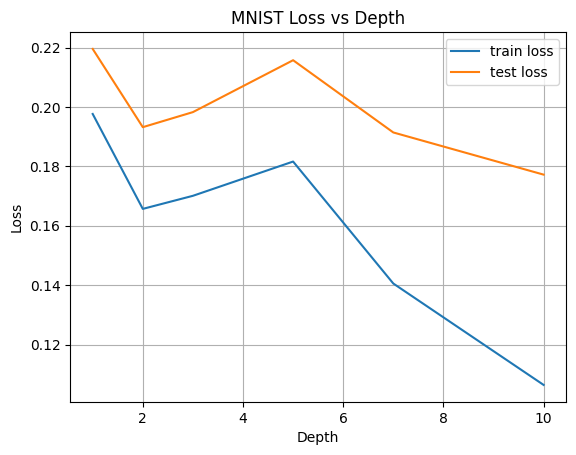

In [ ]:
# Fixed Hyperparameters:
hyperparams = {
    "dataset_type": "mnist",
    "width": 256,
    "criterion": nn.CrossEntropyLoss(),
    "optimizer": optim.Adam,
    "batch_size": 64,
    "lr": 0.0001,
    "max_epoch": 12,
    "normalize": True
}

# Uncomment for test depths analysis:
depths = [1, 2, 3, 5, 7, 10]
errors = hyperparameter_scan(hyperparams, "depth", depths)

for d, (train_loss, test_loss) in errors.items():
  print(f"Depth: {d} | Train Loss: {train_loss:.04} | Test Loss: {test_loss:.04}")

plot_errors(errors, depths, "MNIST Loss vs Depth", "Depth")

##### Discussion - Depth

| Depth | Train Loss | Test Loss |
|---|---|---|
| 1 | 0.1976  | 0.2195 |
| 5 | 0.1816 | 0.2157|
| 10 | 0.1064 | 0.1772 |

<br>

Upon multiple try and error I found that training the network with big depth is very tricky. Seems like for `lr=0.001`, both the train and test loss did not decrease with depth *at all*. This is not likely due to overfitting because the training loss did not improve. Instead, I suspect that this is because the loss landscape becomes very complex for each additional hidden layer, hence finding the optimum is harder (as stated in the lecture).

Hence, I lowered the learning rate to `lr=0.0001`. Then, we see that between around `depth=5` and `depth=10` we get lower train and test loss, which indicates that the optimum is found. Before that, between `depth=2` and `depth=5`, train and test loss both sharply increase, which probably means that the optimum is not found.

Note that in this particular case we do not see overfitting, as we might expect for a network with numerous parameters. I suspect that this is due to a low `max_epoch` number, the network did not see the train data enough times to overfit it.  

***
#### Task 7 - Wide Networks Analysis

Again fixing the below parameters and testing different `width`:

| Hyperparameter | Fixed Value |
|---|---|
| `depth` | 1 |
| `criterion` | nn.CrossEntropyLoss() |
| `optimizer` | optim.Adam |
| `batch_size` | 64 |
| `lr` | 0.001 |
| `max_epoch` | 12 |


<ipython-input-18-c04c0ef3e4a6>:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.data = torch.tensor(self.data, dtype=torch.float32)


Width: 4 | Train Loss: 0.5103 | Test Loss: 0.5119
Width: 8 | Train Loss: 0.307 | Test Loss: 0.3211
Width: 16 | Train Loss: 0.2246 | Test Loss: 0.255
Width: 32 | Train Loss: 0.1254 | Test Loss: 0.1731
Width: 64 | Train Loss: 0.07622 | Test Loss: 0.1416
Width: 128 | Train Loss: 0.04271 | Test Loss: 0.127
Width: 256 | Train Loss: 0.03547 | Test Loss: 0.1477
Width: 512 | Train Loss: 0.03132 | Test Loss: 0.1509
Width: 1024 | Train Loss: 0.04295 | Test Loss: 0.1685


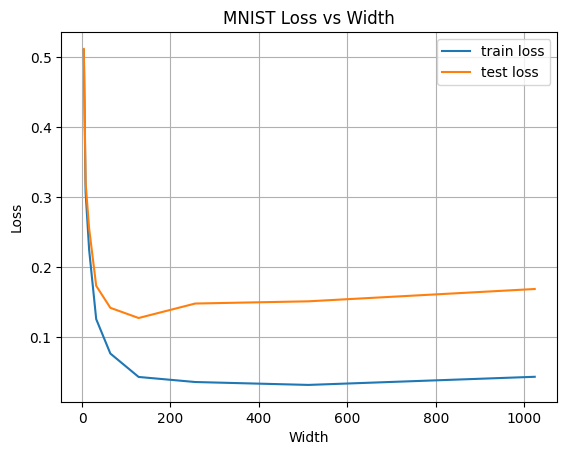

In [ ]:
# Fixed Hyperparameters:
hyperparams = {
    "dataset_type": "mnist",
    "depth": 1,
    "criterion": nn.CrossEntropyLoss(),
    "optimizer": optim.Adam,
    "batch_size": 64,
    "lr": 0.001,
    "max_epoch": 12,
    "normalize": True
}


# Uncomment for width analysis:
widths = [2 ** i for i in range(2, 11)]
errors = hyperparameter_scan(hyperparams, "width", widths, logs=False)

for w, (train_loss, test_loss) in errors.items():
  print(f"Width: {w} | Train Loss: {train_loss:.04} | Test Loss: {test_loss:.04}")

plot_errors(errors, widths, "MNIST Loss vs Width", "Width")

##### Discussion - Width

| Width | Train Loss | Test Loss |
|---|---|---|
| 4 | 0.5103 | 0.5119 |
| 8 | 0.307 | 0.3211 |
| 16 | 0.2246 | 0.255 |
| 32 | 0.1254 | 0.1731 |
| 64 | 0.07622 | 0.1416 |
| 128 | 0.04271 | 0.127 |
| 256 | 0.03547 | 0.1477 |
| 512 | 0.03132 | 0.1509 |
| 1024 | 0.04295 | 0.1685 |

<br>

We can see from the graph results as expected. When we increase the width, the network performs well on the train loss as there are more parameters to "learn" the data - the train loss decreases over the whole range. This also indicates that the optimum is always found.

The test loss, however, decays at first, but then increases from `width=128` (similar to the epoch graph). This is likely due to overfitting - there are so many parameters so that the network learns to replicate the train data, thus it doesn't generalize well to the test data.

Therefore, the optimal width in this case is probably `width=128`.

***
***

## Part 4: The link between Neural Networks and Gaussian Processes [8 points]

### Part 4.1: Proving the relationship between a Gaussian process and a neural network [4 points]

#### Task 1: Proper weight scaling

The scaling makes sense because we want to employ the Central Limit Theorm on $f_i^{(2)}(x)$. CLT states that the sum of $N$ i.i.d r.v. $X_i, ... ,X_N $ with mean and variance $\mu, \sigma^2$ distributes (approx.) as $\mathcal{N}(N \mu, N \sigma^2)$. In our case, the mean turns out to be $\mathbb{E}[f_i^{(2)}]=0$, and the variance depends on the variance of the wieghts $w_{ij}^{(2)}$ (derivation below). Then, in order to keep the variance from diverging as $N_1 \rightarrow \infty$  while applying CLT, we have to normalize the variance of the wieghts by $N_1$. We can also think about it as representing $w_{ij}=\frac{1}{\sqrt{N}}X_{ij}$ for some zero mean i.i.d. random variables $X_{ij}$. Then, the formal definition of CLT is more apparent (see the note in Task 4 below).

***
#### Task 2: Derive the GP relation for a single hidden layer

We will use similar notation to [Matthews et al., 2018], and later some ideas from [Lee et al., 2017] (see Refrences at the bottom). Consider two inputs $x, x'$, and define the vector $\boldsymbol{f}^{(2)}(x)$ with elements $f^{(2)}_i(x)\, , i=1,...,N_2$. Then we define the vector $\boldsymbol{F}^{(2)}$ with length $2N_2$ as the concatenation of $\boldsymbol{f}^{(2)}(x), \boldsymbol{f}^{(2)}(x')$:

$$
\boldsymbol{F}^{(2)} = \begin{pmatrix} \boldsymbol{f}^{(2)}(x) \\ \boldsymbol{f}^{(2)}(x') \end{pmatrix} = \begin{pmatrix} \boldsymbol{b}^{(2)} \\ \boldsymbol{b}^{(2)} \end{pmatrix} + ∑_{j=1}^{N_1} \begin{pmatrix} w^{(2)}_{:, j}g_j^{(1)}(x) \\ w^{(2)}_{:, j}g_j^{(1)}(x') \end{pmatrix}
$$

where the sum over $w^{(2)}_{:, j}$ means that it applies for every neuron in the vector $1 \le i \le 2N_{1}$.

Now, in order to apply multivariate CLT we want to show that the terms in the sum are i.i.d from each other. For each $l$, $w_{ij}^{(l)}$ are drawn from the same distribution, hence they are i.i.d. The post activations for layer 1 $g_j^{(1)}$, are functions of $w_{ij}^{(1)}, b_j^{(1)}$, hence they too are i.i.d. Therefore, the sum is over i.i.d vectors, and we can apply multivariate CLT.
Also, the mean is zero and we normalized the variance, so the variance does not diverge with the limit (as explained above).

To find the limit distribution after multivariate CLT we calculate. Using linearity of expectetion and independence,
$$
\mathbb{E}[f_i^{(2)}(x)]= ∑_i^{N_1}\mathbb{E}[w_{i,j}^{(2)}g_j^{(1)}(x)] + \mathbb{E}[b_i^{(2)}]= ∑_i^{N_1} 0 \cdot \mathbb{E}[g_j^{1}(x)] + 0 = 0\, ,
$$

so $\mu^1 = \boldsymbol{0}$ .

The covariance matrix denoted by $K^1$ would be given by:
$$
K^1_{i,j} (x, x') = \mathbb{E} \left[ (f_i^{(2)(x)} - \mathbb{E}[f_i^{(2)}(x)]) ⋅ (f_j^{(2)(x')} - \mathbb{E}[f_j^{(2)}(x')]) \right] = \mathbb{E} \left[ (f_i^{(2)}(x)) ⋅ (f_j^{(2)}(x')) \right] \, .
$$

If $i \ne j$ then independence gives us
$$
\mathbb{E} \left[ (f_i^{(2)}(x)) ⋅ (f_j^{(2)}(x')) \right] = \mathbb{E} \left[ f_i^{(2)}(x) \right] \mathbb{E} \left[ f_j^{(2)}(x') \right] = 0 \; .
$$
so we are left with the diagonal elements. Further calculations of this expression are done in the general $L$ case, in Task 4 below.

Finally, multivariate CLT gives:
$$
\boldsymbol{F}^{(2)} \xrightarrow{N_1 \rightarrow ∞} \mathcal{N}(\boldsymbol{0}, K^1(x, x'))\, ,
$$

which means that the limiting distribution is a $\mathcal{GP}$ with respect to the inputs.

***
#### Task 3: Why in succession

The proof of the whole network is done by induction, and the inductive hypothesis is that layer $l-1$ is a $\mathcal{GP}$ when $N_{l-1} \to \infty$. Therefore, the hidden layer widths are taken to infinite in succession, because when we show that level $l$ is a $\mathcal{GP}$, we rely on the fact that level $l-1$ is a $\mathcal{GP}$.

***
#### Task 4: Derive the GP relation for multiple hidden layers

We are now doing the inductive step of the derivation. The proof is similar to the 1 hidden layer case (induction base). Assume that $f_j^{l-1}$ is a $\mathcal{GP}$ over the inputs, hence both $f_j^{l-1}$ and the post activations $g_j^{l-1}$ are i.i.d.

The output to the $i$'th neuron on layer $l$ is

$$
f_i^{(l)} (x) = \sum^{N_l}_{j=1} w^{(l)}_{ij} g^{(l-1)}_{j}(x) + b^{(l)}_{j} \; .
$$

and we can construct

$$
\boldsymbol{F}^{(l)} = \begin{pmatrix} \boldsymbol{f}^{(l)}(x) \\ \boldsymbol{f}^{(l)}(x') \end{pmatrix} = \begin{pmatrix} \boldsymbol{b}^{(l)} \\ \boldsymbol{b}^{(l)} \end{pmatrix} + ∑_{j=1}^{N_l} \begin{pmatrix} w^{(l)}_{:, j}g_j^{(l-1)}(x) \\ w^{(l)}_{:, j}g_j^{(l-1)}(x') \end{pmatrix} \; .
$$

Again, the sum is over i.i.d. variables with mean zero and variance normalized by $N_l$, then we can apply CLT.

*Note: to explicitly use the formal definition of CLT, we can represent $w^{(l)}_{i, j} = \frac{1}{\sqrt{N_l}} X_{ij}^{(l)}$ where $X_{ij}^{(l)} \sim \mathcal{N}(0, \sigma_w^{(l)})$. Then the sum over $w_j$ becomes $S_{N_l} = \frac{1}{\sqrt{N_l}} \sum_{j=1}^{N_l}X_{ij}^{(l)} \to \mathcal{N}(0, K^l), \; N_l \to \infty$ where we used the fact the $\mathbb{E}[X_{ij}^{(l)}]=0$.*

The limit distribution of $\boldsymbol{F}^{(l)}$:

$$
\mu^{l-1} = \mathbb{E}[f_i^{(l)}(x)]= ∑_i^{N_1}\mathbb{E}[w_{i,j}^{(l)}g_j^{(l-1)}(x)] + \mathbb{E}[b_i^{(l)}]= ∑_i^{N_1} 0 \cdot \mathbb{E}[g_j^{l-1}(x)] + 0 = 0\, ,
$$

$$
K^{l-1}_{i,j} (x, x') = \mathbb{E} \left[ (f_i^{(l)}(x) - \mathbb{E}[f_i^{(l)}(x)]) ⋅ (f_j^{(l)(x')} - \mathbb{E}[f_j^{(l)}(x')]) \right] = \mathbb{E} \left[ (f_i^{(l)}(x)) ⋅ (f_j^{(l)}(x')) \right] \; ,
$$

if $i \ne j$ then by the mentioned independence $K^{l-1}_{i,j} (x, x') = \mathbb{E} [ f_i^{(l)}(x)] \mathbb{E} [f_j^{(l)}(x')] = 0$. Otherwise,

$$
\mathbb{E} \left[ (f_i^{(l)}(x)) ⋅ (f_i^{(l)}(x')) \right] = \mathbb{E} \left[ \left( ∑_j w_{i,j}^{(l)}g_j^{(l-1)}(x) + b_i^{(l)} \right) \left( ∑_j w_{i,j}^{(l)}g_j^{(l-1)}(x') + b_i^{(l)} \right) \right] \; .
$$

Multiplying the sums and using linearity produces:
* two sums that have zero expectation (since the bias is independent and have zero mean)
* one double sum
*  $\mathbb{E}[b_i^2] = \sigma_b^{(2)}$

The double sum is:

$$
\mathbb{E} \left[ \sum_{k=1} \sum_{j=1} w_{ik}^{(l)}g_{k}^{l-1}(x) w_{ij}^{(l)}g_{j}^{(l-1)}(x')  \right] = \mathbb{E} \left[ (w_{ii}^{(l)}) ^2 g_{i}^{(l-1)}(x)g_{i}^{(l-1)}(x')  \right] = (\sigma_w ^{(l)})^2 \mathbb{E} \left[ g_{i}^{(l-1)}(x)g_{i}^{(l-1)}(x')  \right]
$$

where again we used linearity of expectation, independece of the weights, and zero mean for the weights, in that order.

Finally, we find

$$
\mu^{l-1} = 0 \\
K^{l-1}_{i,j} (x, x') = \delta _{ij}(\sigma _b ^{(l)}) ^2 + \delta_{ij}(\sigma_w ^{(l)})^2 \mathbb{E} \left[ g_{i}^{(l-1)}(x)g_{j}^{(l-1)}(x')  \right]
$$

$$
\boldsymbol{F}^{(l)} \xrightarrow{N_{l-1} \rightarrow ∞} \mathcal{N} \left( \boldsymbol{0}, K^{l-1}(x, x') \right) \, ,
$$

where we have to remember that in this notation $K^{l-1}$ is the kernel for layer $l$ (as $K^1$ was defined the kernel for layer 2).

We had shown that assuming that layer $l-1$ is a $\mathcal{GP}$, then layer $l$ is a $\mathcal{GP}$.

***

### Part 4.2: Analysing the performance of the Gaussian process and a neural network [4 points]

In [11]:
# Please use float64 as default dtype for this part of the assignment
torch.set_default_dtype(torch.float64)

# Another hint: when  computing [ K^L(X,X) + noise^2 Id ]^-1 y and  [ K^L(X,X) + noise^2 Id ]^-1 K^L(X,X*)
# You can TRY cholesky solve as it should be p.d. (except case for numerical errors) - maybe you can use try:/except:
# You can also try to enforce symmetry in posterior covariance by doing (K + K.t())/2

#### Task 0 - Data preprocessing
We will use labels 0 and 1 througout the implementation. Then, as the targets are now $\pm 0.5$, the classification will be done by $y > 0$, where $y$ is the prediction of the GP. We could also use a different threshold than $0$, but I found that this threshold is fair. We also flatten the Cifar images into vectors (this is done at the NNGP class).

In [12]:
class CifarGpDataset(ImageDataset):
    def __init__(self, train: bool, normalize: bool):
      """
        Initializes a dataset for Gaussian Processes using the CIFAR dataset.

        Args:
            train (bool): If True, loads the training dataset; otherwise, loads the testing dataset.
            normalize (bool): If True, normalize the data.

        Note:
            This class is designed for a binary classification task where labels 1 and 2 are selected.
      """

      self.labels = [0, 1]
      super().__init__("cifar", train, normalize, 2)

    def _create_data(self, raw_targets):
      """
        Filter data to labels 0, 1.  Overriding method.

        Args:
            raw_targets (torch.Tensor): Raw target values.
      """

      raw_targets = torch.tensor(raw_targets, dtype=torch.float64)
      self.data = torch.tensor(self.data, dtype=torch.float64)
      self.data = self.data[(raw_targets==1) | (raw_targets == 2), :]


    def _create_targets(self, raw_targets, nclasses):
      """
        Filter targets to labels 0, 1 and +- 0.5 values. Overriding method.

        Args:
            raw_targets (torch.Tensor): Raw target values.
            nclasses (int): Number of classes.
      """

      raw_targets = torch.tensor(raw_targets, dtype=torch.float64)
      self.targets = raw_targets[(raw_targets==1) | (raw_targets == 2)]
      self.targets[self.targets==1] *= 0.5
      self.targets[self.targets==2] *= -1/4

# Uncomment to test the data and targets filtration
# dataset = CifarGpDataset(True, True)
# dataset.data.shape[0] == dataset.targets.shape[0]
# print(dataset.targets)

#### Task 1 - GP Kernel

In [17]:
class ReluKernal:
  def __init__(self, L, var_w, var_b):
    """
      Initializes a ReLU Gaussian Process kernel.
      The class stores all kernals computed for X1 abd X2, upto layer L.

      Args:
          L (int): Maximal layer for the kernel.
          var_w (torch.Tensor): Variance for the weight.
          var_b (torch.Tensor): Variance for the bias.

    """

    self.L = L
    self.sigma_b = torch.sqrt(var_b)
    self.sigma_w = torch.sqrt(var_w)

    self.kernals_11 = {}
    self.kernals_22 = {}
    self.kernals_12 = {}

  def __kernal(self, l, X1, X2, pair=None):
    """
      Internal method for computing the l layer Gaussian Process kernel for
      input matrices X1 X2. The computation assumes that all kernals are
      computed and stored for layer l-1.

      Args:
          l (int): layer for the kernel.
          X1 (torch.Tensor): Input data matrix for the first set of datapoints.
                             of shape M1 x N0.
          X2 (torch.Tensor): Input data matrix for the second set of datapoints.
                             of shape M2 x N0.
          pair (str, optional): Specifies wheter X1 and X2 are the same
                                datapoint, and if so, which combination is it.
                                Values: "11", "22", "12". Default is None.

      Returns:
          torch.Tensor: M1 x M2 kernel matrix for layer l.
    """

    sigma_b = self.sigma_b
    sigma_w = self.sigma_w

    if not l:
      N0 = X1.shape[0]
      return sigma_b + sigma_w * (X1 @ X2.T)/N0

    if pair=="11":
      k11 = self.kernals_11[l-1]
      k22 = k11
      k12 = k11

    elif pair=="22":
      k22 = self.kernals_22[l-1]
      k11 = k22
      k12 = k22

    else:
      k11 = self.kernals_11[l-1]
      k22 = self.kernals_22[l-1]
      k12 = self.kernals_12[l-1]

    diag1 = torch.diagonal(k11, 0) # All we need for computation is the diagonal!
    diag2 = torch.diagonal(k22, 0)

    k_mult= diag1.unsqueeze(1) @ diag2.unsqueeze(0) # Making two matricies from the diagonals and multiply to get (M1 x M2) matrix.
    clipped_arg = torch.clamp(k12 / torch.sqrt( k_mult ), -1., 1.) # Avoiding nan values
    theta = torch.acos(clipped_arg)

    res = sigma_b + sigma_w/(2*torch.pi) * torch.sqrt(k_mult) * (torch.sin(theta) + (torch.pi - theta)*torch.cos(theta))
    return res

  def __call__(self, X1, X2):
    """
      Compute the Gaussian Process kernel for all layers upto L.

      Args:
          X1 (torch.Tensor): Input data matrix for the first set of datapoints.
                             Shape M1 x N0, where N0 is length of datapoint.
          X2 (torch.Tensor): Input data matrix for the second set of datapoints.
                             Shape M2 x N0.

      Returns:
          torch.Tensor: M1 x M2 kernel matrix for layer L.

    """

    if X1.shape[1] != X2.shape[1]:
      raise ValueError("X1 and X2 must have same dimension along axis 1")

    for l in range(self.L):
      self.kernals_11[l] = self.__kernal(l, X1, X1, pair="11")
      self.kernals_22[l] = self.__kernal(l, X2, X2, pair="22")
      self.kernals_12[l] = self.__kernal(l, X1, X2)


    return self.__kernal(self.L, X1, X2)

#test1
# my_kernal = ReluKernal(5, torch.tensor(0.1), torch.tensor(0.1))
# X1 = 50*torch.randn((5, 10))
# X2 = torch.randn((5, 10))
# for i in range(5):
#   print(my_kernal(X1, X2))

# test2
my_kernal = ReluKernal(4, torch.tensor(0.1), torch.tensor(0.1))
X1 = 50*torch.randn((5, 10))
X2 = torch.randn((7, 10))
a = my_kernal(X1, X2)
print(a, a.shape, a.dtype)

tensor([[0.4335, 0.4338, 0.4330, 0.4339, 0.4342, 0.4331, 0.4345],
        [0.4508, 0.4499, 0.4511, 0.4498, 0.4509, 0.4502, 0.4513],
        [0.4193, 0.4202, 0.4198, 0.4200, 0.4220, 0.4197, 0.4201],
        [0.4144, 0.4147, 0.4142, 0.4146, 0.4142, 0.4141, 0.4142],
        [0.4458, 0.4459, 0.4465, 0.4456, 0.4458, 0.4452, 0.4455]]) torch.Size([5, 7]) torch.float64


#### Task 2 - Posterior Mean and Cov
Note - instead of method I implemented here a class. The constructor creates for itself the test and train data based on the given amount of datapoints.

In [ ]:
class NNGP:
    def __init__(self, var_b, var_w, sigma, L, test_samples=1000, train_samples=1000):
        """
          Initializes a Gaussian Process model for CIFAR data.

          Args:
              var_b (torch.Tensor): Variance for the bias.
              var_w (torch.Tensor): Variance for the weight.
              sigma (float): Standard deviation.
              L (int): Maximal layer of GP.
              test_samples (int, optional): Number of samples for testing. Default is 1000.
              train_samples (int, optional): Number of samples for training. Default is 1000.
        """

        self.var_b = var_b
        self.var_w = var_w
        self.sigma = sigma
        self.L = L

        self.k = ReluKernal(L, var_w, var_b)

        train_set = CifarGpDataset(True, True)      # train set
        test_set = CifarGpDataset(False, True)      # test points

        self.X, self.y = train_set.data[:train_samples], train_set.targets[:train_samples] # Truncate data
        self.x_star, self.targets = test_set.data[:test_samples], test_set.targets[:test_samples]

        self.X = torch.flatten(self.X, start_dim=1) # Flatten input images
        self.x_star = torch.flatten(self.x_star, start_dim=1)

    def compute_posterior(self):
        """
          Compute the posterior mean and variance for the Gaussian Process model.

          Returns:
              tuple: Tuple containing posterior mean and variance.
        """

        k_xs_x = self.k(self.x_star, self.X)
        k_x_xs = k_xs_x.T
        k_xs_xs = self.k(self.x_star, self.x_star)
        k_x_x = self.k(self.X, self.X)
        cov_x_x = k_x_x + self.sigma**2 * torch.eye(self.X.shape[0]).to(device=device)

        cov_inverse_y = torch.linalg.solve(cov_x_x, self.y)
        cov_inverse_k = torch.linalg.solve(cov_x_x, k_x_xs)

        posterior_mean = torch.matmul(k_xs_x, cov_inverse_y)
        posterior_var = k_xs_xs - torch.matmul(k_xs_x, cov_inverse_k)

        return posterior_mean, posterior_var

    def predict(self, size, contract=False):
        """
        Generate predictions (i.e f^*) using the Gaussian Process model.
        This method us currently unused.

        Args:
            size (int): Number of samples to generate.
            contract (bool, optional): If True, contract the predictions to binary values. Default is False.

        Returns:
            tuple: Tuple containing predictions and true targets (if contract is True).
        """

        mean, var = self._compute_posterior()
        y_star = torch.distributions.MultivariateNormal(mean, var).sample((size,))

        if contract:
          y_star, targets = (y_star > 0).to(dtype=torch.float64), (self.targets > 0).to(dtype=torch.float64)
          return torch.mean(y_star, 0), targets # fix sum shit here

        return (y_star > 0).to(dtype=torch.float64), (self.targets > 0).to(dtype=torch.float64)


#### Task 3 - NNGP analysis
To find the optimal hyperparameters I implemented a Grid Search (in the appendix). The hyperparameters chosen are the ones with minimum error for $L=6$ in the appendix. Those are:

| Hyperparameter | Fixed Value |
|---|---|
| `var_b` | $10^{-5}$ |
| `var_w` | $3$ |
| `sigma` | $0.01$ |



In [ ]:
N = 1000
targets = (CifarGpDataset(False, True).targets[:N] > 0).to(dtype=torch.float64)


gp_hyperparams = {
    "var_b": torch.tensor(1e-05),
    "var_w": torch.tensor(3),
    "sigma": torch.tensor(0.01),
    "test_samples": N,
    "train_samples": N
}

layers = range(0, 11)
accuracy = []
for i in layers:
  gp_hyperparams["L"] = i
  gp = NNGP(**gp_hyperparams)

  mean, var = gp.compute_posterior()
  predict = (mean > 0).to(dtype=torch.float64)

  err = torch.abs(predict - targets).sum()/N
  print(f"Layers: {i} |  Error: {err.cpu().numpy()}")

  accuracy.append(1 - err)


Layers: 0 |  Error: 0.262
Layers: 1 |  Error: 0.192
Layers: 2 |  Error: 0.17200000000000001
Layers: 3 |  Error: 0.168
Layers: 4 |  Error: 0.164
Layers: 5 |  Error: 0.164
Layers: 6 |  Error: 0.161
Layers: 7 |  Error: 0.159
Layers: 8 |  Error: 0.158
Layers: 9 |  Error: 0.16
Layers: 10 |  Error: 0.162


Text(0.5, 1.0, 'NNGP Accuracy over layers - Labels [0,1]')

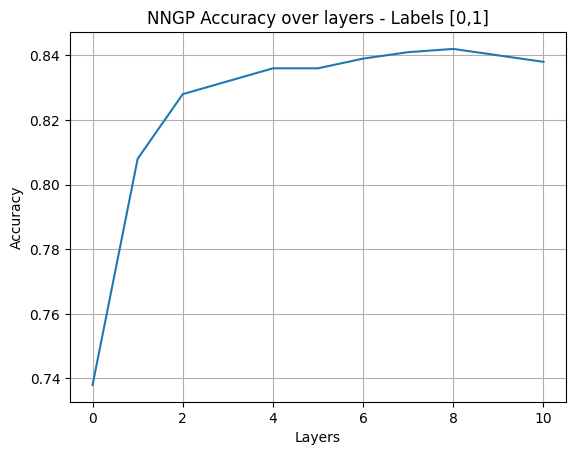

In [ ]:
accuracy = [float(i) for i in accuracy]
plt.plot(layers, accuracy)
plt.grid()
plt.xlabel("Layers")
plt.ylabel("Accuracy")
plt.title("NNGP Accuracy over layers - Labels [0,1]")

##### Discussion -NNGP
From the graph we can see that as we increase the layers (i.e. deeper model), we get better accueracy up to a certain plateau. In this case, the plateau hits at around $L=6$. After that, there are minimal changes in the accueracy. The maximal accueracy is at $L=8$, and we see a slight decrease afterwards.

Also, from (a lot) of trial and error, I had noticed that there are sets of hyperparameters that give accuracy that is no better than chance. Moreover, in most sets of hyperparameters the accuracy decreases after a maximum is reached at some level $L$. I didn't do enough experimentation to affirm that this is the case for all hyperparameters and thus a property of ReLU NNGP. In any case, when the effect does appear, we have a strong analogy to overfitting in DNN. The model learns the test data instead of the of the general effect, and thus models that are deeper than a certain limit $L$ perform worse on the test data.

It is also interesting to note that the hyperparameters were optimised on NNGP with $L=6$, and that is where the plateau seems to start. This too may be a general effect that might be interesting to research.

#### Task 3 - Uncertainty



In [ ]:
gp_hyperparams["L"] = 7
gp = NNGP(**gp_hyperparams)
mean, covariance = gp.compute_posterior()

In [ ]:
covariance = torch.abs(covariance) # Numerical errors might make some values negative
max_val = torch.max(covariance)
max_index = (covariance == max_val).to(dtype=torch.float64).nonzero()[0]

min_val = torch.min(covariance)
min_index = (covariance == min_val).to(dtype=torch.float64).nonzero()[0]

print(min_index, max_index)

tensor([537,  20], device='cuda:0') tensor([898, 898], device='cuda:0')


Lowest variance images (the ones that are most different):

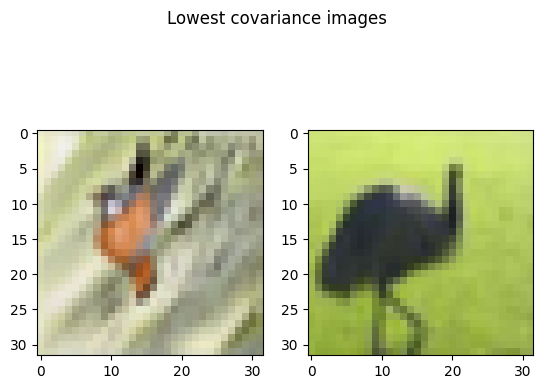

In [ ]:
img_data = CifarGpDataset(False, False).data

myimg1 = np.array(img_data[min_index[0]].cpu().numpy(), int)
myimg2 = np.array(img_data[min_index[1]].cpu().numpy(), int)
img_data[min_index[0]].shape

fig, axes = plt.subplots(1, 2)
ax1 = axes[0]
ax2 = axes[1]

fig.suptitle('Lowest covariance images')
ax1.imshow(myimg1)
ax2.imshow(myimg2)

Highest variance images (the ones that are most similar):

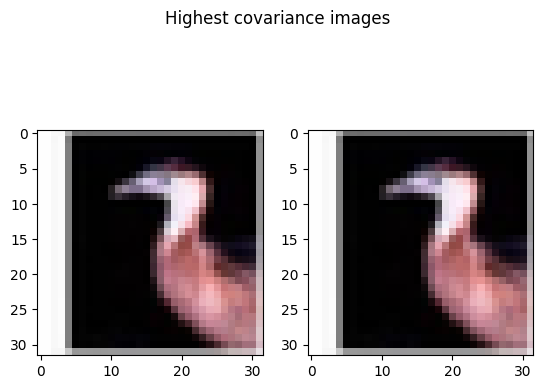

In [ ]:
img_data = CifarGpDataset(False, False).data

myimg1 = np.array(img_data[max_index[0]].cpu().numpy(), int)
myimg2 = np.array(img_data[max_index[1]].cpu().numpy(), int)

fig, axes = plt.subplots(1, 2)
ax1 = axes[0]
ax2 = axes[1]

fig.suptitle('Highest covariance images')
ax1.imshow(myimg1)
ax2.imshow(myimg2)

#### Task 5 - Computational Cost

In [ ]:
import cProfile
gp_hyperparams["L"] = 4
gp_hyperparams['test_samples'] = 1000
gp_hyperparams['train_samples'] = 1000
gp = NNGP(**gp_hyperparams)
cProfile.run('gp.compute_posterior()')

         475 function calls in 0.524 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       39    0.006    0.000    0.010    0.000 <ipython-input-32-fda9715e963f>:22(__kernal)
        3    0.000    0.000    0.010    0.003 <ipython-input-32-fda9715e963f>:74(__call__)
        1    0.000    0.000    0.524    0.524 <ipython-input-33-1e79928f47a3>:31(compute_posterior)
        1    0.000    0.000    0.524    0.524 <string>:1(<module>)
       31    0.000    0.000    0.001    0.000 _tensor.py:34(wrapped)
       30    0.000    0.000    0.001    0.000 _tensor.py:907(__rsub__)
        1    0.000    0.000    0.524    0.524 {built-in method builtins.exec}
       31    0.000    0.000    0.000    0.000 {built-in method torch._C._has_torch_function}
        2    0.033    0.017    0.033    0.017 {built-in method torch._C._linalg.linalg_solve}
       30    0.000    0.000    0.000    0.000 {built-in method torch.acos}
       30    0.001    0

In [ ]:
import cProfile
gp_hyperparams["L"] = 4
gp_hyperparams['test_samples'] = 3000
gp_hyperparams['train_samples'] = 3000
gp = NNGP(**gp_hyperparams)
cProfile.run('gp.compute_posterior()')

         475 function calls in 2.411 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       39    0.010    0.000    0.014    0.000 <ipython-input-32-fda9715e963f>:22(__kernal)
        3    0.001    0.000    0.015    0.005 <ipython-input-32-fda9715e963f>:74(__call__)
        1    0.005    0.005    2.411    2.411 <ipython-input-33-1e79928f47a3>:31(compute_posterior)
        1    0.000    0.000    2.411    2.411 <string>:1(<module>)
       31    0.000    0.000    0.001    0.000 _tensor.py:34(wrapped)
       30    0.000    0.000    0.001    0.000 _tensor.py:907(__rsub__)
        1    0.000    0.000    2.411    2.411 {built-in method builtins.exec}
       31    0.000    0.000    0.000    0.000 {built-in method torch._C._has_torch_function}
        2    0.390    0.195    0.390    0.195 {built-in method torch._C._linalg.linalg_solve}
       30    0.000    0.000    0.000    0.000 {built-in method torch.acos}
       30    0.001    0

##### Discussion - Computational cost

Consider the `tottime` of the `__kernal` and `torch._C._linalg.linalg_solve` methods, which are by far the biggest:

|size | Method | GPU `tottime` | CPU `tottime`
| --- | --- | --- | --- |
| 1000 | `__kernal` | 0.006 | 2.543 |
| 3000 | `__kernal` | 0.01 | 20.952 |
| 1000 | `torch._C._linalg.linalg_solve` | 0.033 | 0.912 |
| 3000 | `torch._C._linalg.linalg_solve` | 0.39 | 2.878 |

The increase in time for the `kernal` computation between the test sizes (on GPU) is
$$\frac{0.01}{0.006}=1.667$$ .

The increase in time for the linalg solve method is:
$$\frac{2.878}{0.912}=1.182$$

From this analysis, it seems that the kernel computation takes more time (i.e. the matrix multiplication in it and more), and also scales bigger (although 1 difference point is not enough to determine the scaling behaviour!).

So in my implementation, the kernel computation takes the most amount of time. With that being said, I belive that a more efficient kernel implementation is possible (for example writing it all in C like pytorch and numpy), but a more efficient matrix inversion is not plausible. Therefore, in the best possible implementation, the matrix inversion would probably be the biggest time drain.

## Refrences

[Matthews et al., 2018] Matthews, A. G. d. G., Rowland, M., Hron, J., Turner,
R. E., and Ghahramani, Z. (2018). Gaussian process behaviour in wide deep
neural networks. arXiv preprint arXiv:1804.11271.

[Lee et al., 2017] Lee, J., Bahri, Y., Novak, R., Schoenholz, S. S., Pennington, J.,
and Sohl-Dickstein, J. (2017). Deep neural networks as gaussian processes. arXiv
preprint arXiv:1711.00165.


## Appendix

#### NNGP Grid Search
I did the grid search for $L=3$ and $L=6$. The results are given below.

In [ ]:
import itertools

N = 1000
gp_hyperparams = {
    "L": 6,
    "test_samples": N,
    "train_samples": N
}

b_range = torch.tensor([ 10**(-i) for i in range(2, 6) ])
w_range = torch.linspace(1, 3, 10)
sigma_range = torch.tensor([ 10**(-i) for i in range(5) ])

targets = (CifarGpDataset(False, True).targets[:N] > 0).to(dtype=torch.float64)

res = {}
for (b, w, sigma) in itertools.product(b_range, w_range, sigma_range):
  gp_hyperparams["var_b"] = b
  gp_hyperparams["var_w"] = w
  gp_hyperparams["sigma"] = sigma
  gp = NNGP(**gp_hyperparams)

  mean, var = gp.compute_posterior()
  predict = (mean > 0).to(dtype=torch.float64)

  err = torch.abs(predict - targets).sum()/N
  print(f"b = {b.cpu().numpy():.06f} | w = {w.cpu().numpy():.02f} | sigma = {sigma.cpu().numpy():.04f} | error={err:.03f}")

  res[(float(b), float(w), float(sigma))] = float(err)

b = 0.010000 | w = 1.00 | sigma = 1.0000 | error=0.492
b = 0.010000 | w = 1.00 | sigma = 0.1000 | error=0.477
b = 0.010000 | w = 1.00 | sigma = 0.0100 | error=0.201
b = 0.010000 | w = 1.00 | sigma = 0.0010 | error=0.205
b = 0.010000 | w = 1.00 | sigma = 0.0001 | error=0.230
b = 0.010000 | w = 1.22 | sigma = 1.0000 | error=0.492
b = 0.010000 | w = 1.22 | sigma = 0.1000 | error=0.380
b = 0.010000 | w = 1.22 | sigma = 0.0100 | error=0.198
b = 0.010000 | w = 1.22 | sigma = 0.0010 | error=0.208
b = 0.010000 | w = 1.22 | sigma = 0.0001 | error=0.226
b = 0.010000 | w = 1.44 | sigma = 1.0000 | error=0.492
b = 0.010000 | w = 1.44 | sigma = 0.1000 | error=0.302
b = 0.010000 | w = 1.44 | sigma = 0.0100 | error=0.197
b = 0.010000 | w = 1.44 | sigma = 0.0010 | error=0.205
b = 0.010000 | w = 1.44 | sigma = 0.0001 | error=0.222
b = 0.010000 | w = 1.67 | sigma = 1.0000 | error=0.492
b = 0.010000 | w = 1.67 | sigma = 0.1000 | error=0.256
b = 0.010000 | w = 1.67 | sigma = 0.0100 | error=0.192
b = 0.0100

In [ ]:
sorted_keys = sorted(res, key=lambda x: res[x])
for i in range(10):
  print(sorted_keys[i], res[sorted_keys[i]])

(1e-05, 3.0, 0.01) 0.161
(1e-05, 2.7777777777777777, 0.01) 0.162
(1e-05, 1.2222222222222223, 0.001) 0.166
(1e-05, 2.5555555555555554, 0.01) 0.166
(0.0001, 3.0, 0.01) 0.168
(1e-05, 1.0, 0.001) 0.168
(1e-05, 1.4444444444444444, 0.001) 0.168
(1e-05, 1.6666666666666665, 0.001) 0.169
(1e-05, 2.111111111111111, 0.001) 0.169
(0.0001, 2.3333333333333335, 0.01) 0.17


**Best values L = 3:**

| $(\sigma_b ^2, \sigma_2 ^2, \sigma)$| Error |
|--- | ---|
| (1e-05, 2.5, 0.01) | 0.166 |
| (0.0001, 2.5, 0.01)  |0.172 |
| (1e-05, 1.6, 0.01)  |0.173 |
| (1e-05, 1.9, 0.01)  |0.174 |
| (1e-05, 2.2, 0.01)  |0.174 |
| (1e-05, 1.3, 0.01)  |0.176 |
| (0.0001, 2.2, 0.01)  |0.179 |
| (0.0001, 1.9, 0.01)  |0.18 |
| (0.0001, 1.6, 0.01)  |0.181 |
| (1e-05, 1.0, 0.01) | 0.182 |

**Best values L = 6**

| $(\sigma_b ^2, \sigma_2 ^2, \sigma)$| Error |
|--- | ---|
|(1e-05, 3.0, 0.01) | 0.161 |
|(1e-05, 2.7777777777777777, 0.01) | 0.162 |
|(1e-05, 1.2222222222222223, 0.001) | 0.166 |
|(1e-05, 2.5555555555555554, 0.01) | 0.166 |
|(0.0001, 3.0, 0.01) | 0.168 |
|(1e-05, 1.0, 0.001) | 0.168 |
|(1e-05, 1.4444444444444444, 0.001) | 0.168 |
|(1e-05, 1.6666666666666665, 0.001) | 0.169 |
|(1e-05, 2.111111111111111, 0.001) | 0.169 |
|(0.0001, 2.3333333333333335, 0.01) | 0.17|

I also liked the following params because they gave a nice graph (but not so much as a good error comared to the others): `(0.0001, 1.28, 0.001)`

